# A Neural Network based Diabetes Prediction On Imbalanced Dataset

Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings;
warnings.simplefilter('ignore')

Load Dataset

In [2]:
df=pd.read_csv('F:\AI n DS classes\diabetes.csv')

Display & Analyze the DataSet

In [3]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#Checking the presence of outliers

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

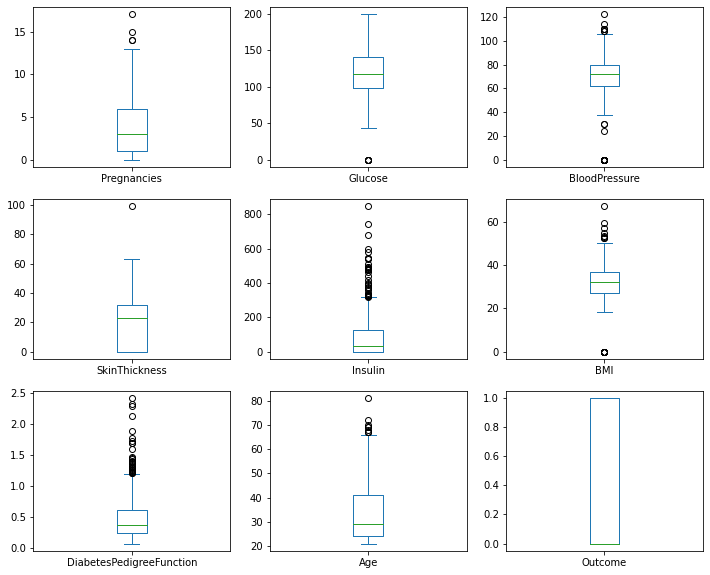

In [6]:
df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(12,10))

In [7]:
#  Applying IQR method for attribute 'Pregnancies'
Q1=df['Pregnancies'].quantile(0.25)                         #using IQR method
Q3=df['Pregnancies'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lr = Q1-(1.5*IQR)
Ur = Q3+(1.5*IQR)
print(Lr, Ur)

1.0
6.0
5.0
-6.5 13.5


In [8]:
# Replace the outliers values with median of dataset
median = df.loc[df['Pregnancies'] > 13.5, 'Pregnancies'].median()
df["Pregnancies"] = np.where(df["Pregnancies"] > 13.5 , median ,df['Pregnancies'])
median = df.loc[df['Pregnancies'] < -6.5, 'Pregnancies'].median()
df["Pregnancies"] = np.where(df["Pregnancies"] < -6.5 , median ,df['Pregnancies'])

In [9]:
#  Applying IQR method for attribute'Blood Pressure'
Q1=df['BloodPressure'].quantile(0.25)                         #using IQR method
Q3=df['BloodPressure'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lr = Q1-(1.5*IQR)
Ur = Q3+(1.5*IQR)
print(Lr, Ur)

62.0
80.0
18.0
35.0 107.0


In [10]:
# Replace the outliers values with median of dataset
median = df.loc[df['BloodPressure'] > 107, 'BloodPressure'].median()
df["BloodPressure"] = np.where(df["BloodPressure"] > 107 , median ,df['BloodPressure'])
median = df.loc[df['BloodPressure'] < 35, 'BloodPressure'].median()
df["BloodPressure"] = np.where(df["BloodPressure"] < 35, median ,df['BloodPressure'])

In [11]:
#  Applying IQR method for attribute'Insulin'
Q1=df['Insulin'].quantile(0.25)                         #using IQR method
Q3=df['Insulin'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lr = Q1-(1.5*IQR)
Ur = Q3+(1.5*IQR)
print(Lr, Ur)

0.0
127.25
127.25
-190.875 318.125


In [12]:
# Replace the outliers values with median of dataset
median = df.loc[df['Insulin'] > 318.125, 'Insulin'].median()
df["Insulin"] = np.where(df["Insulin"] > 318.125 , median ,df['Insulin'])

In [13]:
#  Applying IQR method for attribute'BMI'
Q1=df['BMI'].quantile(0.25)                         #using IQR method
Q3=df['BMI'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lr = Q1-(1.5*IQR)
Ur = Q3+(1.5*IQR)
print(Lr, Ur)

27.3
36.6
9.3
13.35 50.550000000000004


In [14]:
# Replace the outliers values with median of dataset
median = df.loc[df['BMI'] > 50.55, 'BMI'].median()
df["BMI"] = np.where(df["BMI"] > 50.55 , median ,df['BMI'])
median = df.loc[df['BMI'] < 13.35, 'BMI'].median()
df["BMI"] = np.where(df["BMI"] < 13.35, median ,df['BMI'])

In [15]:
#  Applying IQR method for attribute'DiabetesPedigreefunction'
Q1=df['DiabetesPedigreeFunction'].quantile(0.25)                         #using IQR method
Q3=df['DiabetesPedigreeFunction'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lr = Q1-(1.5*IQR)
Ur = Q3+(1.5*IQR)
print(Lr, Ur)

0.24375
0.62625
0.38249999999999995
-0.32999999999999996 1.2


In [16]:
# Replace the outliers values with median of dataset
median =df.loc[df['DiabetesPedigreeFunction'] > 1.2, 'DiabetesPedigreeFunction'].median()
df["DiabetesPedigreeFunction"] = np.where(df["DiabetesPedigreeFunction"] > 1.2 , median ,df['DiabetesPedigreeFunction'])

median = df.loc[df['DiabetesPedigreeFunction'] < -0.32999999999999996, 'DiabetesPedigreeFunction'].median()
df["DiabetesPedigreeFunction"] = np.where(df["DiabetesPedigreeFunction"] < -0.32999999999999996 , median ,df['DiabetesPedigreeFunction'])

In [17]:
#  Applying IQR method for attribute'Age'
Q1=df['Age'].quantile(0.25)                         #using IQR method
Q3=df['Age'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lr = Q1-(1.5*IQR)
Ur = Q3+(1.5*IQR)
print(Lr, Ur)

24.0
41.0
17.0
-1.5 66.5


In [18]:
# Replace the outliers values with median of dataset
median = df.loc[df['Age'] > 78, 'Age'].median()
df["Age"] = np.where(df["Age"] > 78, median ,df['Age'])
median = df.loc[df['Age'] <-1.5, 'Age'].median()
df["Age"] = np.where(df["Age"] < -1.5 , median ,df['Age'])

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

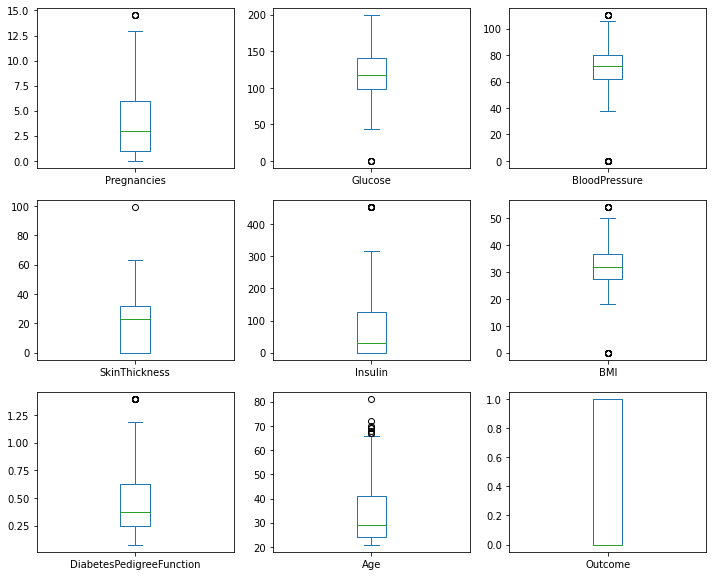

In [19]:
#check outliers after replacement of outliers
df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(12,10))

In [20]:
#to determine presence of missing values in dataset
df[["Glucose", "SkinThickness","Insulin",
    "BloodPressure","BMI"]] =  df[["Glucose","SkinThickness", "Insulin","BloodPressure","BMI"]].replace(0, np.NaN)

In [21]:
df.isnull().sum()[1:6]

Glucose            5
BloodPressure     38
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

<AxesSubplot:>

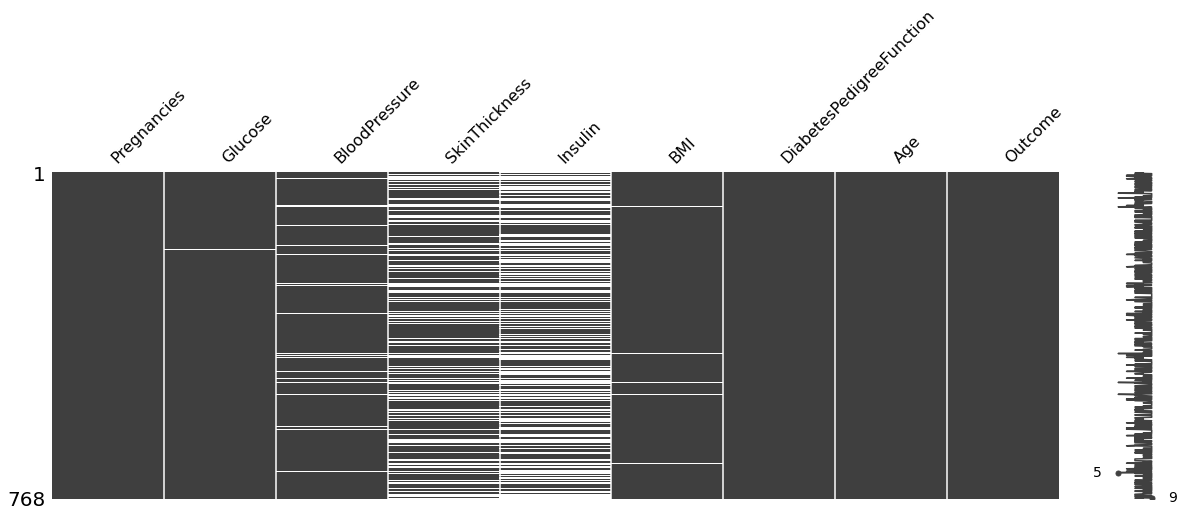

In [22]:
import missingno as mno
mno.matrix(df, figsize = (20, 6))

Insights: Glucose,BloodPressure,SkinThickness,Insulin,BMI have missing values            

In [23]:
# fill missing values with mean values
df.fillna(df.mean(),inplace=True)

<AxesSubplot:>

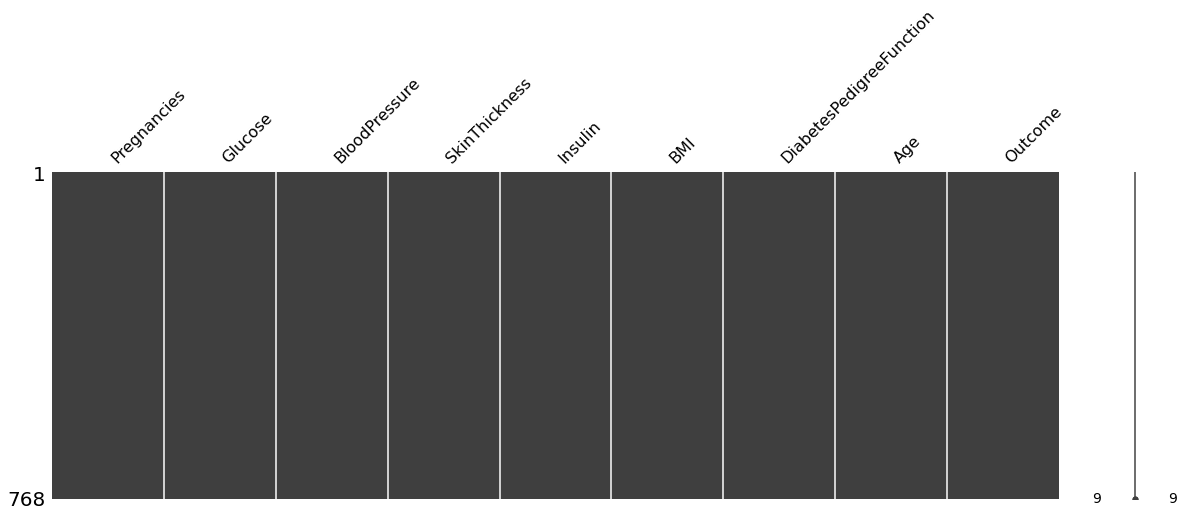

In [24]:
#to check missing values
import missingno as mno
mno.matrix(df, figsize = (20, 6))

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.842448,3.359964,0.000,1.00000,3.000000,6.000000,14.500
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.000
BloodPressure,768.0,72.571233,11.711370,38.000,64.00000,72.571233,80.000000,110.000
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.000
Insulin,768.0,155.162437,80.070773,14.000,121.50000,155.162437,155.162437,452.500
BMI,768.0,32.435403,6.785427,18.200,27.50000,32.400000,36.600000,54.100
DiabetesPedigreeFunction,768.0,0.466240,0.306278,0.078,0.24375,0.372500,0.626250,1.394
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.000
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.000


Define the Target and feature values

In [26]:
target=df['Outcome']
feature = df.drop('Outcome', axis=1)

Convert datatype float into integer for further training of dataset

In [28]:
df = df.astype(int)

In [29]:
#splitting of dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature,target, test_size = 0.20,random_state=0)

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [31]:
# Feature extraction
test = SelectKBest(score_func=f_classif, k=8)
fit = test.fit(feature,target)

In [32]:
# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

[ 39.511 245.859  23.139  37.233  38.28   82.753  26.961  46.141]


In [33]:
feature = fit.transform(feature)
# Summarize selected features
print(feature[0:5,:])

[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 1.552e+02 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 1.552e+02 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 2.915e+01 1.552e+02 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 1.394e+00
  3.300e+01]]


In [34]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
from collections import Counter
from imblearn.over_sampling import ADASYN
ada = ADASYN()
X_train, y_train = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train))

Resampled dataset shape Counter({0: 393, 1: 381})


In [36]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(500,500,500,500,500), activation='relu', solver='adam', max_iter=10,random_state=1)
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(500, 500, 500, 500, 500), max_iter=10,
              random_state=1)

In [37]:
pred = mlp.predict(X_test)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(mlp,X_test,y_test,cv=10)
conf_mat = confusion_matrix(y_test,y_pred)
scores= classification_report(y_test,y_pred)
print(roc_auc_score(y_test, y_pred))
print(conf_mat)
print(scores)

0.8294889640087493
[[91 16]
 [ 9 38]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       107
           1       0.70      0.81      0.75        47

    accuracy                           0.84       154
   macro avg       0.81      0.83      0.82       154
weighted avg       0.85      0.84      0.84       154



In [39]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(mlp,X_test,y_test,cv=5)
conf_mat = confusion_matrix(y_test,y_pred)
scores= classification_report(y_test,y_pred)
print(roc_auc_score(y_test, y_pred))
print(conf_mat)
print(scores)

0.8294889640087493
[[91 16]
 [ 9 38]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       107
           1       0.70      0.81      0.75        47

    accuracy                           0.84       154
   macro avg       0.81      0.83      0.82       154
weighted avg       0.85      0.84      0.84       154

